In [1]:
from arcgis.gis import GIS

In [2]:
agol = GIS('https://imagem.maps.arcgis.com', 'mpontes_imagem', '@Imagem123')

In [3]:
siurb = GIS('https://siurb.rio/portal', 'datarioadmin', 'datarioadmin123')

In [35]:
svc_siurb = siurb.content.get('0d9539dc03924c848093ae72c0f1e8a2')

<Item title:"Dados_Dengue" type:Feature Layer Collection owner:datarioadmin>
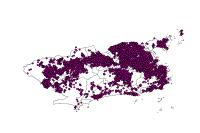

In [36]:
svc_siurb

In [37]:
import arcgis.features

In [38]:
flc = arcgis.features.FeatureLayerCollection.fromitem(svc_siurb)

In [39]:
flc

<FeatureLayerCollection url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer">

### Tentativa de criacao de servico from scratch

Parametros de entrada
```
create_service(name, service_description='', has_static_data=False, max_record_count=1000, supported_query_formats='JSON', capabilities=None, description='', copyright_text='', wkid=102100, create_params=None, service_type='featureService', owner=None, folder=None, item_properties=None, is_view=False)
```

In [40]:
item_properties = {
    'type': svc_siurb.type, 
    'typeKeywords': svc_siurb.typeKeywords,
    'description': svc_siurb.description,
    'title': svc_siurb.title,
    'tags': svc_siurb.tags,
    'snippet': svc_siurb.snippet,
    'extent': svc_siurb.extent,
    'spatialReference': svc_siurb.spatialReference,
    'culture': svc_siurb.culture
}
item_properties

{'type': 'Feature Service',
 'typeKeywords': ['ArcGIS Server',
  'Data',
  'Feature Access',
  'Feature Service',
  'Map Service',
  'Metadata',
  'Service'],
 'description': None,
 'title': 'Dados_Dengue',
 'tags': ['Dados_Dengue', 'FeatureServer'],
 'snippet': None,
 'extent': [[-43.79385951486818, -23.087791324718243],
  [-43.09756722596363, -22.745680889145824]],
 'spatialReference': 'SIRGAS_2000_UTM_Zone_23S',
 'culture': 'pt-br'}

### Atencao nessa etapa pois o wkid n eh no manager (conforme é no hosted), aqui se encontra direto nas properties da flc

In [41]:
flc.properties.spatialReference.wkid

31983

In [93]:
new_item = agol.content.create_service(
    svc_siurb.title, # TITLE -> NO HOSTED EH NAME 
    capabilities=flc.properties.capabilities, 
    description=svc_siurb.description, 
    wkid=flc.properties.spatialReference.wkid,
    item_properties=item_properties
)

In [94]:
new_item

<Item title:"Dados_Dengue" type:Feature Layer Collection owner:mpontes_imagem>

### Item template criado. Agora adicionar a definition para o servico, incluindo layers e tabelas

In [95]:
new_item_flc = arcgis.features.FeatureLayerCollection.fromitem(new_item)

In [96]:
new_item_flc

<FeatureLayerCollection url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer">

In [97]:
new_item_flc.manager.add_to_definition

<bound method FeatureLayerCollectionManager.add_to_definition of <FeatureLayerCollectionManager url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/admin/services/Dados_Dengue/FeatureServer">>

### Obtem a definition para layers e tabelas
#### A forma que se busca a definition de um item hosted eh totalmente diferente

In [98]:
#display(flc.layers[0].properties)

def rem_rel(ly):
    if 'relationships' in ly:
        del ly["relationships"] # remove relacionamentos.
    return ly

ly_tb_def = {
    "spatialReference": {**flc.properties.spatialReference},
    "initialExtent": {**flc.properties.initialExtent},
    "fullExtent": {**flc.properties.fullExtent},
    "units": flc.properties.units,
    "layers": [ {**rem_rel(layer.properties)} for layer in flc.layers ],
    "tables": [ {**rem_rel(table.properties)} for table in flc.tables ] 
}
ly_tb_def

{'spatialReference': {'wkid': 31983, 'latestWkid': 31983},
 'initialExtent': {'xmin': 626928.9452454082,
  'ymin': 7474959.057740689,
  'xmax': 696391.0933915817,
  'ymax': 7495515.554194006,
  'spatialReference': {'wkid': 31983, 'latestWkid': 31983}},
 'fullExtent': {'xmin': 623533.398,
  'ymin': 7446251.7721,
  'xmax': 695352.8865,
  'ymax': 7483378.5593,
  'spatialReference': {'wkid': 31983, 'latestWkid': 31983}},
 'units': 'esriMeters',
 'layers': [{'currentVersion': 10.61,
   'id': 0,
   'name': 'PainelDengue.DBO.FT_DADOS_DENGUE',
   'parentLayerId': -1,
   'defaultVisibility': True,
   'minScale': 0,
   'maxScale': 0,
   'type': 'Feature Layer',
   'geometryType': 'esriGeometryPoint',
   'description': '',
   'copyrightText': '',
   'editFieldsInfo': None,
   'ownershipBasedAccessControlForFeatures': None,
   'syncCanReturnChanges': False,
   'isDataVersioned': False,
   'supportsRollbackOnFailureParameter': True,
   'archivingInfo': {'supportsQueryWithHistoricMoment': False,
   

### Atribui definition ao novo item criado, tornando-o igual ao item do portal

In [99]:
new_item_flc.manager.add_to_definition(ly_tb_def)

{'success': True,
 'layers': [{'name': 'PainelDengue.DBO.FT_DADOS_DENGUE', 'id': 0},
  {'name': 'PainelDengue.DBO.LimiteBairro', 'id': 1}],
 'tables': [{'name': 'PainelDengue.DBO.TB_DENGUE_2016', 'id': 2}]}

In [101]:
new_item_flc.layers

[<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/1">]

In [102]:
new_item_flc.tables

[<Table url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/2">]

In [103]:
new_item

<Item title:"Dados_Dengue" type:Feature Layer Collection owner:mpontes_imagem>

### Inicio no processo de copiar os dados, se dará por meio do REST add

In [104]:
flc.layers

[<FeatureLayer url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer/0">,
 <FeatureLayer url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer/1">]

#### Obtendo pelo metodo query em sua execucao padrao conforme assinatura abaixo

```
query(where='1=1', out_fields='*', time_filter=None, geometry_filter=None, return_geometry=True, return_count_only=False, return_ids_only=False, return_distinct_values=False, return_extent_only=False, group_by_fields_for_statistics=None, statistic_filter=None, result_offset=None, result_record_count=None, object_ids=None, distance=None, units=None, max_allowable_offset=None, out_sr=None, geometry_precision=None, gdb_version=None, order_by_fields=None, out_statistics=None, return_z=False, return_m=False, multipatch_option=None, quantization_parameters=None, return_centroid=False, return_all_records=True, result_type=None, historic_moment=None, sql_format=None, return_true_curves=False, return_exceeded_limit_features=None, as_df=False, **kwargs)
```

In [105]:
origin_copy = flc.layers + flc.tables
origin_copy

[<FeatureLayer url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer/0">,
 <FeatureLayer url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer/1">,
 <Table url:"https://pgeo3.rio.rj.gov.br/arcgis/rest/services/dengue/Dados_Dengue/FeatureServer/2">]

In [106]:
target_copy = new_item_flc.layers + new_item_flc.tables
target_copy

[<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/1">,
 <Table url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/2">]

In [115]:
import json

In [116]:
def query_and_copy(origin_all, target_all):
    ctrl_e = []
    for origin in origin_all:
        try:
            print('querying origin %s' % origin.properties.id)
            featureset = origin.query() # query all by default
            target = next(y for y in target_all if y.properties.id == origin.properties.id)
            try:
                # According to the api, rollback_on_failure=True (default)
                target.edit_features(adds=featureset)
            except Exception as se:
                ctrl_e.append(str(se))
        except Exception as e:
            ctrl_e.append(str(e))
    return ctrl_e

In [119]:
def clean_all(target_all):
    ctrl_e = []
    for target in target_all:
        try:
            print('removing data to target id %s' % target.properties.id)
            target.delete_features(where='1=1')
            r=target.query()
            if len(r):
                raise Exception('remove failed') 
        except Exception as e:
            ctrl_e.append(str(e))
    return ctrl_e

In [120]:
cr = clean_all(target_copy)
cr

removing data to target id 0
removing data to target id 1
removing data to target id 2


[]

In [121]:
qcr = query_and_copy(origin_copy, target_copy)
qcr

querying origin 0
querying origin 1
querying origin 2


['<urlopen error [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto>',
 '<urlopen error [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto>']

In [122]:
def assert_data_count(origin_all, target_all):
    ctrl_e = []
    for origin in origin_all:
        try:
            origin_c = origin.query(return_count_only=True) # count all
            target = next(y for y in target_all if y.properties.id == origin.properties.id)
            target_c = target.query(return_count_only=True) # count all
            if origin_c != target_c:
                excp_info = json.dumps({ 
                    'id': target.properties.id, 
                    'e':'The item id %s has different count from the origin svc (%s of %s)' % (target.properties.id, target_c, origin_c)
                })
                raise Exception(excp_info)
        except Exception as e:
            ctrl_e.append(str(e))
    return ctrl_e

In [123]:
adcr = assert_data_count(origin_copy, target_copy)
adcr

['{"id": 0, "e": "The item id 0 has different count from the origin svc (0 of 97747)"}',
 '{"id": 2, "e": "The item id 2 has different count from the origin svc (0 of 32211)"}']

In [124]:
def need_to_try(assertion_result, origin_all, target_all, current_try=1, tries_max=3):
    if not len(assertion_result):
        return
    try:
        for r in assertion_result:
            info = json.loads(r) 
            origin = next(y for y in origin_all if y.properties.id == info['id'])
            target = next(y for y in target_all if y.properties.id == info['id'])
            resend_r = query_and_copy([origin], [target])
            if len(resend_r):
                raise Exception(' '.join(resend_r))
    except Exception as e:
        print (e)
        if current_try==tries_max:
            raise Exception('The attempt limit to migrate data was reached -> %s' % ' '.join(assertion_result))
        need_to_try(assertion_result, origin_all, target_all, current_try+1, tries_max)

In [125]:
def test(current=1, max=3):
    print (current)
    if (current==3):
        return
    test(current+1)

In [126]:
test()

1
2
3


In [127]:
need_to_try(adcr, origin_copy, target_copy)

querying origin 0
<urlopen error [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu
corretamente após um período de tempo ou a conexão estabelecida falhou
porque o host conectado não respondeu>
querying origin 0
<urlopen error [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto>
querying origin 0
<urlopen error [WinError 10054] Foi forçado o cancelamento de uma conexão existente pelo host remoto>


Exception: The attempt limit to migrate data was reached -> {"id": 0, "e": "The item id 0 has different count from the origin svc (0 of 97747)"} {"id": 2, "e": "The item id 2 has different count from the origin svc (0 of 32211)"}

## Como pode-se notar no bloco acima, a operacao eh sujeita a erro tornando a migracao de um item com muitos registros inviavel devido ao tempo de operacao. Parametros poderiam ser calibrados como, poucos registros na query, poucos registros no applyedits, o que tornaria extremamente lento uma operacao de migracao de dados. Este exemplo, aproximadamente 100 mil registros ja tornaram a operacao inviavel.